In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'celeba-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F29561%2F37705%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T145152Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D289ec711899f14f386445ea5ef85b5b49b395ed15ca57b3479d34ad4390d76d6687b840bd329934c1a440bab52f0b6cbb0136e4a5a27898058ea7a1eab6c9567bc7066beda8d1ad80ccf302506a3dcafe03f08d22122b3a996bc63e3347befa1b8d4b843ac832e3087c96e1d13cac32de7d569b2faaf3e8783ed219137d909a535626e55fa0a0cffdc3f45719baee5d9da43c1cd1e67419984b5ccd21504bd2be7b6948b1105291ff7ee0ce319abe92c542426e6d70b81ba8f86ef6f12f7396f85c5da7fe277f227a326b7ab3cb04056a5ec891bcb2c8a1b8e9b0fe7ba0c4731530e26e12994d9a8b988865d8965341393933899b54e248cb8a0d747d457c7ba'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1427750792 bytes downloaded
Downloaded and uncompressed: celeba-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/027155.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/162944.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/043785.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/150598.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/135945.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/103659.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/106541.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/160014.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/184986.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/089886.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/079423.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/147956.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeb

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/180518.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/005854.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/050393.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/010668.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/018022.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/197638.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/104321.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/012601.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/176230.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/086378.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/153460.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/193085.jpg
/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeb

In [ ]:
import os
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder

from torch.utils.data import DataLoader, Dataset

image_size = 64
# Path to CelebA dataset
IMAGE_PATH = '../input/celeba-dataset/img_align_celeba/'

transform = transforms.Compose([

    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

celeba_dataset = ImageFolder(IMAGE_PATH, transform)
#data_loader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=4, drop_last=True)

import pandas
csv_file = "/kaggle/input/celeba-dataset/list_attr_celeba.csv"
df = pandas.read_csv(csv_file)

In [ ]:
def filter_images(dataset, dframe):
    men_with_glasses = []
    men_without_glasses = []
    women_with_glasses = []
    women_without_glasses = []
    people_with_glasses = []
    people_without_glasses = []
    smiling_men = []
    people_with_hat = []
    people_with_mustache =[]
    people_without_mustache =[]

#smiling men , people with hat, people with mustache , people without mustache
#smiling 31, mustache 22, wearing_hat 35
    for idx in range(len(dataset)):


        gender = "men" if dframe['Male'][idx] == 1 else "women"
        glasses = "with_glasses" if dframe['Eyeglasses'][idx] == 1 else "without_glasses"
        mustache = "with_mustache" if dframe['Mustache'][idx] == 1 else "without_mustache"
        smiling = "smiling" if dframe['Smiling'][idx] == 1 else "not_smiling"
        wearing_hat = "having_hat" if dframe['Wearing_Hat'][idx] == 1 else "no_hat"

        if gender == "men" and smiling == "smiling":
           smiling_men.append(idx)
        if wearing_hat == "having_hat":
           people_with_hat.append(idx)
        if mustache == "with_mustache":
            people_with_mustache.append(idx)
        else:
            people_without_mustache.append(idx)

        if gender == "men" and glasses == "with_glasses":
            men_with_glasses.append(idx)
            people_with_glasses.append(idx)
        elif gender == "men" and glasses == "without_glasses":
            men_without_glasses.append(idx)
            people_without_glasses.append(idx)
        elif gender == "women" and glasses == "with_glasses":
            women_with_glasses.append(idx)
            people_with_glasses.append(idx)
        elif gender == "women" and glasses == "without_glasses":
            women_without_glasses.append(idx)
            people_without_glasses.append(idx)

    return {
        "men_with_glasses": men_with_glasses,
        "men_without_glasses": men_without_glasses,
        "women_with_glasses": women_with_glasses,
        "women_without_glasses": women_without_glasses,
        "people_without_glasses": people_without_glasses,
        "people_with_glasses": people_with_glasses,
        "smiling_men":smiling_men,
        "people_with_hat":people_with_hat,
        "people_with_mustache": people_with_mustache,
        "people_without_mustache": people_without_mustache,

    }

filtered_indices = filter_images(celeba_dataset, df)
men_with_glasses_indices = filtered_indices["men_with_glasses"]
men_without_glasses_indices = filtered_indices["men_without_glasses"]
women_with_glasses_indices = filtered_indices["women_with_glasses"]
women_without_glasses_indices = filtered_indices["women_without_glasses"]
people_without_glasses_indices = filtered_indices["people_without_glasses"]
people_with_glasses_indices = filtered_indices["people_with_glasses"]
smiling_men_indices = filtered_indices["smiling_men"]
people_with_hat_indices = filtered_indices["people_with_hat"]
people_with_mustache_indices = filtered_indices["people_with_mustache"]
people_without_mustache_indices = filtered_indices["people_without_mustache"]

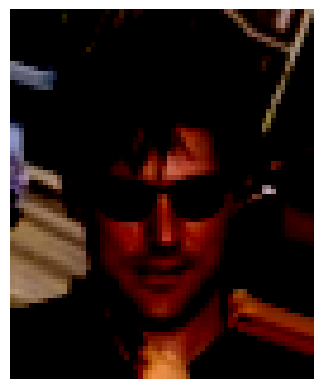

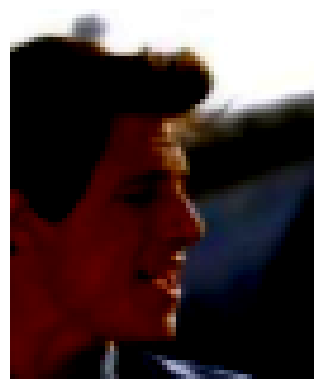

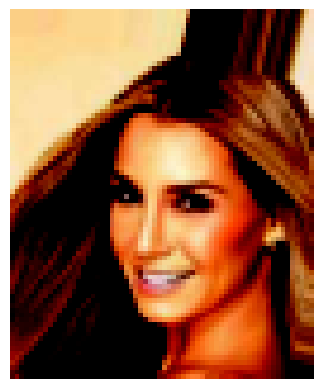

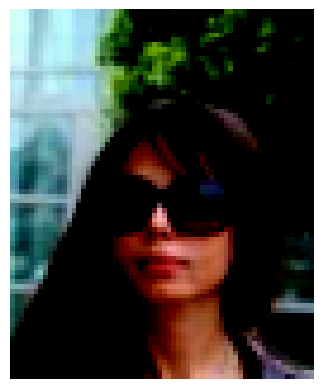

In [ ]:
import torch
class SubsetDataset(Dataset):
    def __init__(self, dataset, indices, transform=None):
        self.dataset = dataset
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        idx_in_dataset = self.indices[idx]
        sample, label = self.dataset[idx_in_dataset]
        return sample, label





# Create a subset dataset for men without glasses
men_with_glasses_dataset = SubsetDataset(celeba_dataset, men_with_glasses_indices)
men_without_glasses_dataset = SubsetDataset(celeba_dataset, men_without_glasses_indices)
women_with_glasses_dataset = SubsetDataset(celeba_dataset, women_with_glasses_indices)
women_without_glasses_dataset = SubsetDataset(celeba_dataset, women_without_glasses_indices)

import matplotlib.pyplot as plt

sample_image, _ = men_with_glasses_dataset[0]
plt.imshow(sample_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

sample_image, _ = men_without_glasses_dataset[0]
plt.imshow(sample_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

sample_image, _ = women_without_glasses_dataset[0]
plt.imshow(sample_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

sample_image, _ = women_with_glasses_dataset[0]
plt.imshow(sample_image.permute(1, 2, 0))
plt.axis('off')
plt.show()


In [ ]:
from torch.utils.data import DataLoader


# Create DataLoader objects for each subset dataset
men_with_glasses_loader = DataLoader(men_with_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)
men_without_glasses_loader = DataLoader(men_without_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)
women_with_glasses_loader = DataLoader(women_with_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)
women_without_glasses_loader = DataLoader(women_without_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
print(men_with_glasses_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.autograd import Variable
import itertools
from PIL import Image
import numpy as np


Tensor = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor

# Define Generator and Discriminator architectures
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 7, stride=1, padding=3),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True),
        )
        self.residual_blocks = nn.Sequential(
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256),
            ResidualBlock(256)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, 7, stride=1, padding=3),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.residual_blocks(x)
        x = self.decoder(x)
        return x

class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(channels, channels, 3, padding=1)
        self.conv2 = nn.Conv2d(channels, channels, 3, padding=1)
        self.instancenorm = nn.InstanceNorm2d(channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.relu(self.instancenorm(self.conv1(x)))
        out = self.instancenorm(self.conv2(out))
        out = out + residual
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, padding=1),
            nn.InstanceNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, padding=1),
            nn.Flatten()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        return x

# Initialize the networks
generator_AB = Generator()
generator_BA = Generator()
discriminator_A = Discriminator()
discriminator_B = Discriminator()

# Define hyperparameters
lr = 0.0002
beta1 = 0.5
num_epochs = 2

# Define optimizers
optimizer_G = optim.Adam(itertools.chain(generator_AB.parameters(), generator_BA.parameters()), lr=lr, betas=(beta1, 0.999))
optimizer_D_A = optim.Adam(discriminator_A.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_B = optim.Adam(discriminator_B.parameters(), lr=lr, betas=(beta1, 0.999))

# Define loss functions
criterion_GAN = nn.MSELoss()
criterion_cycle = nn.L1Loss()
criterion_identity = nn.L1Loss()



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.utils import save_image

# Define the transformations for the input images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images
    transforms.ToTensor(),  # Convert to PyTorch tensor
    # Normalize the images
])

# Create DataLoader objects for each subset
dataset_men_with_glasses_loader = DataLoader(men_with_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)
dataset_men_without_glasses_loader = DataLoader(men_without_glasses_dataset, batch_size=4, shuffle=True, num_workers=4)

# Define adversarial and cycle-consistency loss functions
adversarial_loss = nn.BCELoss()
cycle_consistency_loss = nn.L1Loss()
fake_a_buffer = []
fake_b_buffer = []
R_A = []
R_B = []

# Training Loop
num_epochs = 1
for epoch in range(num_epochs):
    for i, (real_A, real_B) in enumerate(zip(dataset_men_with_glasses_loader, dataset_men_without_glasses_loader)):
        # Adversarial ground truths
        valid = torch.ones((real_A[0].size(0), 1))
        fake = torch.zeros((real_A[0].size(0), 1))

        optimizer_G.zero_grad()

        # Apply adaptive pooling to handle different input shapes
        real_A = nn.functional.adaptive_avg_pool2d(real_A[0], (80, 64))
        real_B = nn.functional.adaptive_avg_pool2d(real_B[0], (80, 64))

        # Identity loss
        loss_id_A = criterion_identity(generator_BA(real_A), real_A)
        loss_id_B = criterion_identity(generator_AB(real_B), real_B)

        # GAN loss
        fake_B = generator_AB(real_A)
        loss_GAN_AB = criterion_GAN(discriminator_B(fake_B)[0], valid)
        fake_A = generator_BA(real_B)
        loss_GAN_BA = criterion_GAN(discriminator_A(fake_A)[0], valid)
        loss_GAN = (loss_GAN_AB + loss_GAN_BA) / 2

        # Cycle loss
        recov_A = generator_BA(fake_B)
        loss_cycle_A = criterion_cycle(recov_A, real_A)
        recov_B = generator_AB(fake_A)
        loss_cycle_B = criterion_cycle(recov_B, real_B)
        loss_cycle = (loss_cycle_A + loss_cycle_B) / 2

        # Total loss
        lambda_cyc = 10
        loss_G = loss_GAN + lambda_cyc * loss_cycle
        loss_G.backward()
        optimizer_G.step()

        recov_A = generator_BA(fake_B)
        recov_B = generator_AB(fake_A)

        optimizer_D_A.zero_grad()
        # Real loss
        loss_real = criterion_GAN(discriminator_A(real_A)[0], valid)
        # Fake loss
        if i == 0:
            fake_A_buffer = fake_A
        fake_A_ = fake_A_buffer
        fake_A_buffer = fake_A
        loss_fake = criterion_GAN(discriminator_A(fake_A_.detach()[0])[0], fake)
        # Total loss
        loss_D_A = (loss_real + loss_fake) / 2
        loss_D_A.backward()
        optimizer_D_A.step()

        optimizer_D_B.zero_grad()
        # Real loss
        loss_real = criterion_GAN(discriminator_B(real_B)[0], valid)
        # Fake loss
        if i == 0:
            fake_B_buffer = fake_B
        fake_B_ = fake_B_buffer
        fake_B_buffer = fake_B
        loss_fake = criterion_GAN(discriminator_B(fake_B_.detach()[0])[0], fake)
        # Total loss
        loss_D_B = (loss_real + loss_fake) / 2
        loss_D_B.backward()
        optimizer_D_B.step()

        if i == 2:
            R_A = real_A
            R_B = real_B

KeyboardInterrupt: 

torch.Size([4, 3, 80, 64])


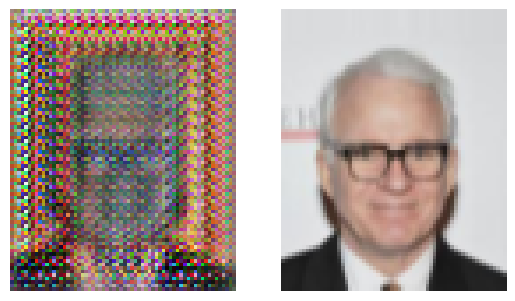

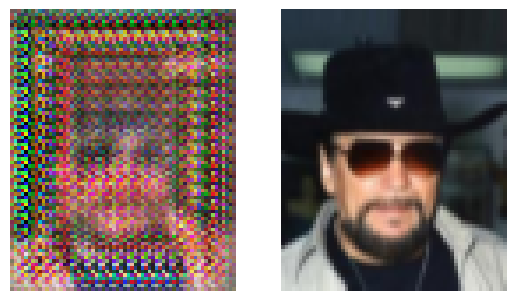

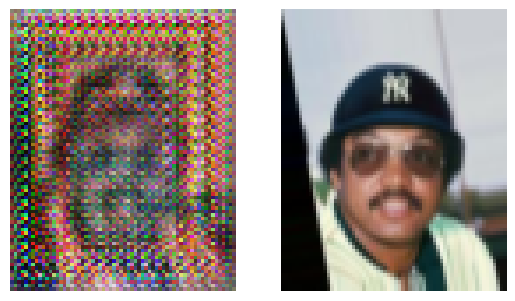

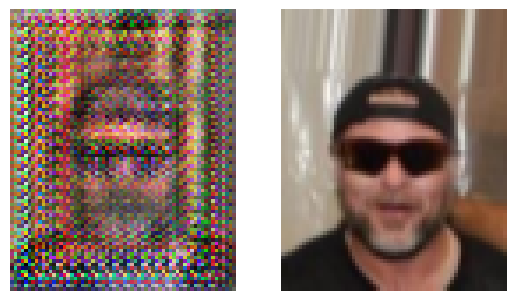

In [ ]:
batch_sz = 4
f_1 = generator_AB(R_A)
R_A_np = f_1.detach().numpy().transpose(0, 2, 3, 1)
R_A_n = R_A.numpy().transpose(0,2,3,1)
print(f_1.shape)

for j in range(batch_sz):
  plt.subplot(1,2,1)
  plt.imshow(R_A_np[j]*0.5+0.5)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(R_A_n[j]*0.5 + 0.5)
  plt.axis('off')
  plt.show()


torch.Size([4, 3, 80, 64])


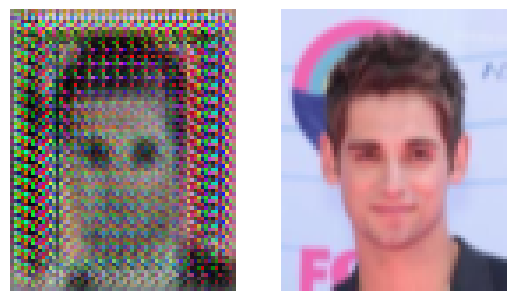

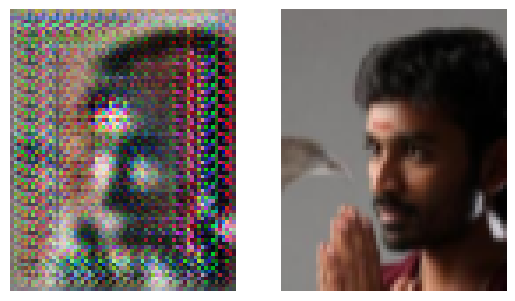

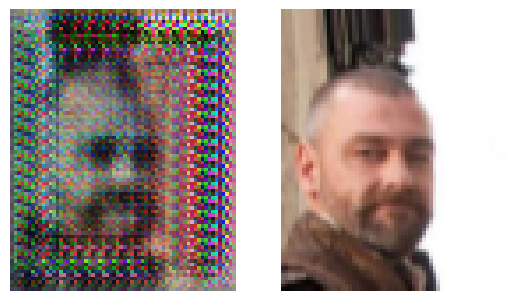

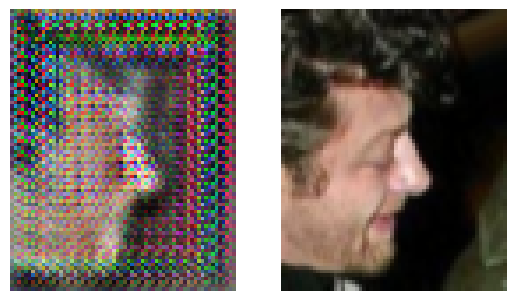

In [ ]:
f_1 = generator_BA(R_B)
R_A_np = f_1.detach().numpy().transpose(0, 2, 3, 1)
R_A_n = R_B.numpy().transpose(0,2,3,1)
print(f_1.shape)

for j in range(batch_sz):
  plt.subplot(1,2,1)
  plt.imshow(R_A_np[j]*0.5+0.5)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(R_A_n[j]*0.5 + 0.5)
  plt.axis('off')
  plt.show()